# Esercitazione 8

L'obiettivo di questa esercitazione è stimare il valore di aspettazione dell'Hamiltoniana

$$ \hat{H} = -\frac{1}{2}\frac{\partial^2}{\partial x^2} + V(x) \quad \text{dove} \quad V(x) = x^4 - \frac{5}{2}x^2 $$

sullo stato di ground state ignoto $|\Psi_0\rangle$ seguendo due vie alternative:
* implementando un codice Monte Carlo variazionale;
* modificando il codice PIMC/PIGS che ci viene fornito in foma non completa.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from IPython.display import HTML

In [12]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

### Esercizio 8.1

Vogliamo utilizzare un metodo Monte Carlo variazionale per la stima dell'energia di ground state di una particella quantistica in una dimensione. Per raggiungere questo scopo abbiamo bisogno di una funzione parametrica di trial $\Psi_T^{p_1,p_2..,p_N}(x)$ ragionevole che ci permetta di approssimare lo stato fondamentale e, in seguito, di ricavare il valore di aspettazione dell'energia corrispondente. Un buon modello per la funzione d'onda dello stato fondamentale è la seguente funzione d'onda di prova:
$$ \Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$$

dove $\sigma$ e $\pm\mu$ rappresentano rispettivamente la radice della varianza e la media delle due gaussiane parzialmente sovrapposte. Ci accorgiamo che questa funzione può essere una buona approssimazione di $\Psi_0(x)$ in quanto è una funzione simmetrica (dato che $V(x)$ è una funzione pari) e presenta due massimi (il potenziale $V(x)$ è caratterizzato da due minimi speculari). Notiamo inoltre che non siamo interessati all'esatto fattore di normalizzazione in quanto viene eliminato in seguito nel calcolo.
A questo punto abbiamo bisogno di calcolare analiticamente la seguente quantità:

$$ E_K = \frac{{-\frac{1}{2}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)} = -\frac{1}{2\sigma^4}\cdot\bigg[x^2+\mu^2-\sigma^2-2x\mu\tanh\bigg(\frac{x\mu}{\sigma^2}\bigg)\bigg]$$

Questa quantità rappresenta il contributo di energia cinetica $E_K$ all'energia totale. Per quanto riguarda il termine potenziale non sono necessari conti analitici in quanto non è caratterizzato da alcun tipo di operatore di derivazione e risulta già nella rappresentazione delle coordinate.

### Esercizio 8.2

In questa seconda parte cerchiamo i valori di $\sigma$ e $\mu$ che minimizzano l'energia totale $E_{T}$ (o analogalmente $E_{K}$) e, in base a questa scelta, determiniamo il valore di $E_{T}$.
Una volta scelta l'espressione analitica di $\Psi_T^{\sigma,\mu}(x)$ infatti possiamo stimare un limite superiore all'energia media di stato fondamentale applicando il *principio variazionale*:
$$
E_T=\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$


Per fare ciò utilizziamo l'algoritmo Metropolis Monte Carlo già sviluppato nell'esercitazione 5. In questo caso la nuova distribuzione da campionare è:

$$ \frac{|\Psi_T^{\sigma,\mu}(x)|^2}{\int dx |\Psi_T^{\sigma,\mu}(x)|^2}$$

Il codice viene dunque semplicemente riadattato inserendo questa nuova distribuzione. 

---
Per andare alla ricerca dei parametri migliori viene generata una griglia tridimensionale di valori di $E_{T}$ in funzione di $\sigma$ e $\mu$, con passo reticolare pari a $\Delta\sigma=0.01$ e $\Delta\mu=0.01$ (precisione con la quale si ricerca il set di parametri ottimale). Su questa griglia si osservano i valori dell'energia e ci si avvicina ad una regione in cui questa manifesta un minimo. Nel punto di minimo si leggono i valori di $\sigma$ e $\mu$ che in questo caso sono:
* $\mu =0.8$;
* $\sigma =0.61$;

In base a questa ricerca risulta che il minimo di energia è pari a $E_T=-0.4441\pm0.0008$. Questi due valori rappresentano rispettivamente il valor medio e l'incertezza trovati grazie al metodo a blocchi che viene usato per ogni nodo della griglia. Nello specifico vengono impiegati $5\cdot10^6$ misure divise in $100$ blocchi. 

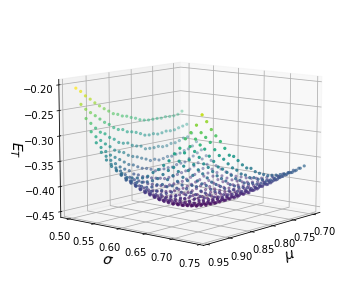

In [142]:
M = 625
X = np.zeros(M)
Y = np.zeros(M)
Z = np.zeros(M)
Err = np.zeros(M)

fileXYZ = open('energy_sigma_mu.dat', 'r')

for i in range(M):
    X[i], Y[i], Z[i], Err[i] = fileXYZ.readline().split()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel(r'$\mu$',fontsize=14)
ax.set_ylabel(r'$\sigma$',fontsize=14)
ax.set_zlabel(r'$E_{T}$',fontsize=14)
ax.view_init(10, 40)
plt.show()

In questa figura 3D osserviamo come l'energia $E_T$ possieda un punto di minimo per i valori sopra indicati.

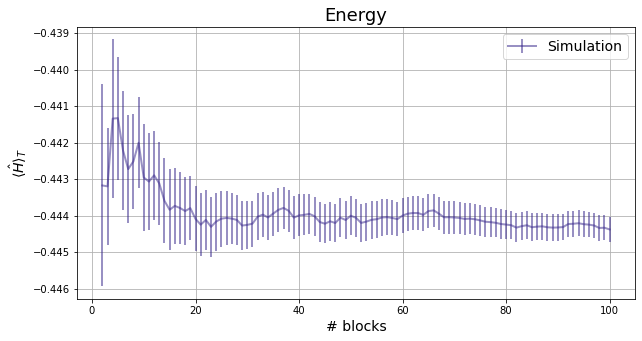

In [141]:
ene = np.loadtxt('energy.dat')
x = np.arange(2,101,1)
plt.figure(figsize=(10,5))
plt.title("Energy",fontsize=18)
plt.errorbar(x, ene.T[0], yerr=ene.T[1], color='#332288', alpha=0.5, label='Simulation', linewidth=2)
#plt.hlines(-0.46046,0,100, color='red', linestyle='-', label="Theoric expected value", linewidth=2, alpha=0.5)
plt.ylabel(r'$ \langle {\hat H} \rangle_T  $',fontsize=14)
plt.xlabel("# blocks",fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.grid(True)
plt.show()

Nel grafico qui sopra è riportata l'energia $E_T$ in funzione del numero di blocchi. All'ultimo blocco il valore dell'energia è $E_T=-0.4441\pm0.0008$ mentre l'energia prevista per il GS è $E_{GS}\simeq -0.4605$. Non c'è quindi compatibilità col precedente risultato ottenuto con il metodo Monte Carlo Variazionale, e ciò può essere dovuto alla scelta non ottimale della famiglia di funzioni parametriche da ottimizzare.

Vogliamo ora confrontare la probabilità esatta con il risultato della simulazione.
Siamo consapevoli che il problema in esame non è analiticamente risolubile in modo diretto, ma possiamo risolvere l'equazione di Schrodinger indipendente dal tempo in un modo più naive.
Possiamo discretizzare lo spazio 1D e rendere la funzione d'onda un vettore, le cui componenti sono i valori che assume su un reticolo di punti posti molto vicini tra loro.
A questo punto l'equazione di Schrodinger diventa un'equazione matriciale e risolverla significa trovare gli autostati e gli autovalori della matrice.
Vogliamo quindi visualizzare la probabilità ottenuta con il metodo VMC e confrontarla con quella derivata dalla risoluzione del problema discreto agli autovalori.

Ground state energy:  -0.46046587969271535
Ground state energy variational MC:  -0.4441 +/- 0.0008 


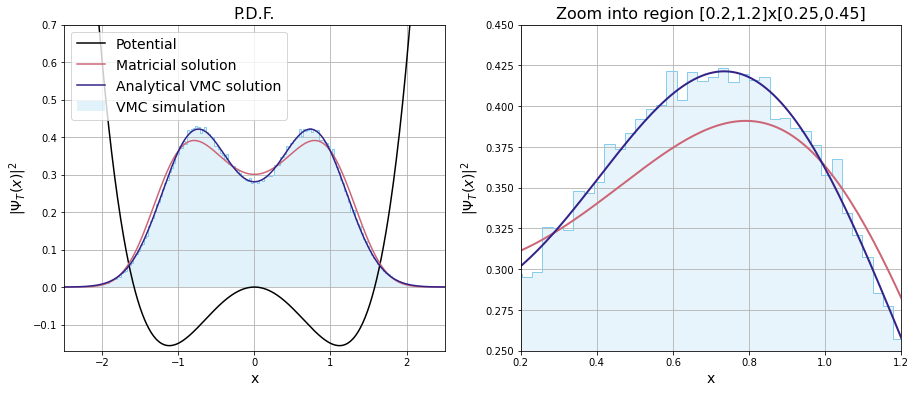

In [9]:
hist = np.loadtxt('hist.dat')

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations
mu = 0.8
sigma = 0.61

def Vpot(x):
    return (x**2 - 2.5)*x**2

def Psi_squared(x):
    return (np.exp(-(x-mu)**2/(2*(sigma)**2)) + np.exp(-(x+mu)**2/(2*(sigma)**2)))**2

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)
psi_squared = Psi_squared(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
norm = quad(Psi_squared, -3, 3)[0]
scale = 0.1

print("Ground state energy: ", E[0])
print("Ground state energy variational MC:", ' -0.4441 +/- 0.0008 ')

# Plot a few things
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(x, scale*V, color="black", label="Potential",lw=1.5) # plot the potential
plt.plot(x,(psi[0])**2, color="#CC6677", label='Matricial solution',lw=1.5)
plt.plot(x,psi_squared/norm, color="#332288", label='Analytical VMC solution',lw=1.5)
plt.hist(hist,bins=200, color='#88CCEE', alpha=0.25, density=True, label='VMC simulation',histtype='stepfilled')
plt.hist(hist,bins=200, color='#88CCEE', alpha=1, density=True, histtype='step')
plt.title("P.D.F.",fontsize=16)
plt.xlabel("x",fontsize=14)
plt.ylabel(r'$|\Psi_T(x)|^2$',fontsize=14)
plt.grid(True)
plt.xlim((-2.5,2.5))
plt.ylim((-0.17,0.7))
plt.legend(loc='upper left',fontsize=14)

plt.subplot(1,2,2)
plt.plot(x,(psi[0])**2, color="#CC6677", label='Matricial solution',lw=2)
plt.plot(x,psi_squared/norm, color="#332288", label='Analytical VMC solution',lw=2)
plt.hist(hist,bins=200, color='#88CCEE', alpha=0.2, density=True, label='VMC simulation',histtype='stepfilled')
plt.hist(hist,bins=200, color='#88CCEE', alpha=1, density=True,histtype='step')
plt.title("Zoom into region [0.2,1.2]x[0.25,0.45]",fontsize=16)
plt.xlabel("x",fontsize=14)
plt.ylabel(r'$|\Psi_T(x)|^2$',fontsize=14)
plt.grid(True)
plt.xlim((0.2,1.2))
plt.ylim((0.25,0.45))
plt.show()

Come possiamo vedere dal grafico qui sopra, la compatibilità tra il risultato variazionale e quello teorico non è soddisfacente, come anticipato dall'osservazione dell'energia.
D'altra parte però, questa funzione rappresenta la miglior stima dello stato di GS che si può ottenere in base alla  famiglia di funzioni di prova scelta. Dunque l'unico modo per migliorare questo risultato sembra essere quello di trovare una famiglia di funzioni più adeguata al problema di interesse.

### Esercizio8.3

Lo scopo di quest'ultima parte è innanzitutto usare l'algoritmo PIGS (Path Integral Ground State) (simulando il sistema a $T=0$) per studiare lo stesso sistema quantistico 1D del precedente esercizio e poi estendere la trattazione usando l'algoritmo PIMC (Path Integral Monte Carlo) ($T>0$) e osservare come l'istogramma con le configurazioni campionate cambia aumentando la temperatura.

Il metodo PIGS si fonda sull'osservazione che, partendo da un qualsiasi stato di prova $|\Psi_{trial}\rangle$ tale per cui $\langle \Psi_{GS}|\Psi_{trial}\rangle \neq 0$, l'evoluzione per tempi immaginari di quest'ultimo 
porta ad avere l'esatto (a meno di costanti) stato $|\Psi_{GS}\rangle$ nel limite $\tau\rightarrow+\infty$:

$$|\Psi(\tau)\rangle = e^{-\tau \hat{H}}|\Psi_{GS}\rangle = e^{-\tau \hat{H}} \sum_i c_i |\Psi_{i}\rangle = \sum_i c_i e^{-\tau \hat{H}}|\Psi_{i}\rangle \rightarrow c_0 e^{-\tau E_0} |\Psi_{GS}\rangle \quad \text{per}\,\,\tau\rightarrow +\infty$$

Per fare questo da un punto di vista pratico si ricorre innanzitutto alla rappresentazione di Path Integration suddividendo il tempo dell'evoluzione in un numero grande ($M$) di sottointervalli:

$$\Psi_{GS}(\vec{r}) = \langle \vec{r}|\Psi_{GS}\rangle = \lim_{\tau\rightarrow\infty}\int d\vec{r}_1 d\vec{r}_2 ..d\vec{r}_M \,\langle\vec{r}| e^{-\frac{\tau}{M}\hat{H}}|\vec{r}_1\rangle \langle\vec{r}_1| e^{-\frac{\tau}{M}\hat{H}}|\vec{r}_2\rangle .. \langle\vec{r}_{M-1}| e^{-\frac{\tau}{M}\hat{H}}|\vec{r}_M\rangle \, \Psi_T(\vec{r}_M) $$

A questo punto per i diversi propagatori $\langle\vec{r}_i| e^{-\frac{\tau}{M}\hat{H}}|\vec{r}_{i+1}\rangle$ (elementi fuori diagonale della matrice intensità) viene usata l'approssimazione primitiva. Questa vale a patto che i singoli sottointervalli siano piccoli, ossia che $\frac{\tau}{M}<<1$. Grazie a questa tecnica viene creato un isomorfismo tra il sistema quantistico ed un sistema classico di polimeri lineari aperti (o chiusi nel caso PIMC), dove tra le $M$ particelle di ogni polimero l'interazione è di tipo elastico. 
Campionare il sistema classico isomorfo significa dunque effettuare un campionamento esatto del vero moto di punto zero del sistema quantistico e questa operazione viene effettuata usando ancora una volta l'algoritmo di Metropolis.
Naturalmente per far sì che il Metropolis sia massimamente efficace, è necessario regolare la probabilità di accettazione attorno al $50\%$ per ogni simulazione e per ogni mossa. 
Infatti sono 3 le mosse che richiedono l'accettazione Metropolis: la traslazione rigida del polimero, il moto Browniano (solo per il PIGS) e il Brownian Bridge. Le ultime due distruggono e ricreano rispettivamente le code o la parte centrale del polimero, mentre la prima effettua semplicemente una traslazione identica per ogni grado di libertà.
Attenzione però: in realtà, le mosse browniane eseguono le ricostruzione del polimero campionando in maniera esatta la parte cinetica della matrice densità e quindi, oltre a campionare con il Metropolis la parte potenziale, eseguono anche un *importance sampling*. Questo rende le mosse di moto Browniano e di Brownian Bridge particolarmente efficienti e l'accettazione relativa a queste due mosse risulta essere più difficile (a volte impossibile) da abbassare.

Vogliamo dunque simulare il sistema proiettando:
* una funzione d'onda costante $\Psi_{trial}(x)=1$;
* $\Psi_{trial}(x)=\Psi^{\sigma,\mu}_{trial}(x)$ con i parametri ottimizzati nella parte precedente dell'esercitazione.





Vogliamo ora confrontare i risultati dell'algoritmo PIGS (usando entrambe le funzioni d'onda) con il risultato ottenuto con il metodo Variational Monte Carlo. Mostriamo che l'algoritmo PIGS è in grado di campionare lo stato GS con un ottimo accordo rispetto alla funzione d'onda ottenuta via metodo matriciale.

**A) PIGS:** 

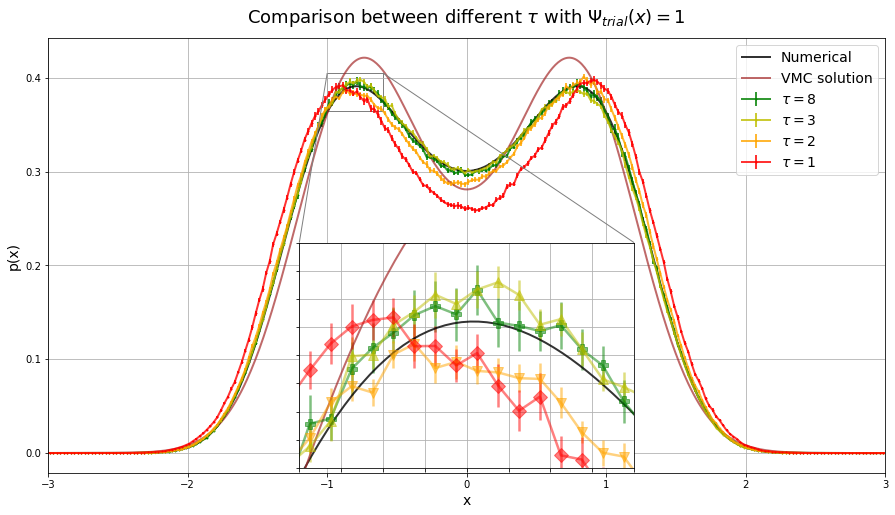

In [152]:
x = np.linspace(-5, 5, 1000)
dx = x[1] - x[0] # the step size
V = Vpot(x)
psi_squared = Psi_squared(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
norm = quad(Psi_squared, -3, 3)[0]

fig, ax = plt.subplots(figsize=(15,8))
plt.title(r'Comparison between different $\tau$ with $\Psi_{trial}(x)=1$ ', fontsize=18,pad=15)
plt.xlabel('x',fontsize=14)
plt.ylabel('p(x)',fontsize=14)
plt.grid(True)
plt.xlim(-3,3)

#Zoom
x1, x2, y1, y2 = -1, -0.6, 0.365,0.405
axins = zoomed_inset_axes(ax, zoom=6, loc='lower center')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

#Grafico soluzione analitica e VMC
ax.plot(x, psi[0]**2, lw=2, color='black',label="Numerical",alpha=0.8)
axins.plot(x, psi[0]**2, lw=2,color='black', label="Numerical",alpha=0.8)
ax.plot(x,psi_squared/norm, lw=2, color="brown", label='VMC solution',alpha=0.7)
axins.plot(x,psi_squared/norm, lw=2, color="brown", label='VMC solution',alpha=0.7)

#tau=8:
t, Psi, errPsi = ((np.genfromtxt('probability_const_wf_tau8.dat', usecols=i, autostrip=True)) for i in range(3))

ax.errorbar(t, Psi, yerr=errPsi, color='g', alpha=0.8, marker='P',linewidth=2, markersize=1, label=r'$\tau=8$')
axins.errorbar(t, Psi, yerr=errPsi , color='g',marker='P',linewidth=2.5 ,markersize=10, alpha=0.5)

#tau=3:
t, Psi, errPsi = ((np.genfromtxt('probability_const_wf_tau6.dat', usecols=i, autostrip=True)) for i in range(3))

ax.errorbar(t, Psi, yerr=errPsi, color='y', alpha=0.8, marker='^',linewidth=2, markersize=1, label=r'$\tau=3$')
axins.errorbar(t, Psi, yerr=errPsi , color='y',marker='^',linewidth=2.5 ,markersize=10, alpha=0.5)

#tau=2:
t, Psi, errPsi = ((np.genfromtxt('probability_const_wf_tau2.dat', usecols=i, autostrip=True)) for i in range(3))

ax.errorbar(t, Psi, yerr=errPsi, color='orange', alpha=0.8, marker='v',linewidth=2, markersize=1, label=r'$\tau=2$')
axins.errorbar(t, Psi, yerr=errPsi ,color='orange',marker='v',linewidth=2.5 ,markersize=10, alpha=0.5)

#tau=1:
t, Psi, errPsi = ((np.genfromtxt('probability_const_wf_tau1.dat', usecols=i, autostrip=True)) for i in range(3))

ax.errorbar(t, Psi, yerr=errPsi, color='r', alpha=0.8, marker='D',linewidth=2, markersize=1, label=r'$\tau=1$')
axins.errorbar(t, Psi, yerr=errPsi ,color='r',marker='D',linewidth=2.5 ,markersize=10, alpha=0.5)

ax.legend(loc='best',fontsize=14)
plt.grid(True)
plt.draw()
plt.show()

Nel primo caso vediamo come la funzione d'onda di prova costante, per avere una buona compatibilità col risultato teorico, debba essere lasciata evolvere almeno per un tempo immaginario di $\tau\sim3$. In questo caso, infatti $\Psi_{trial}(x)$ è troppo diversa da quella dello stato fondamentale per avere risultati soddisfacenti al di sotto di questo tempo. 

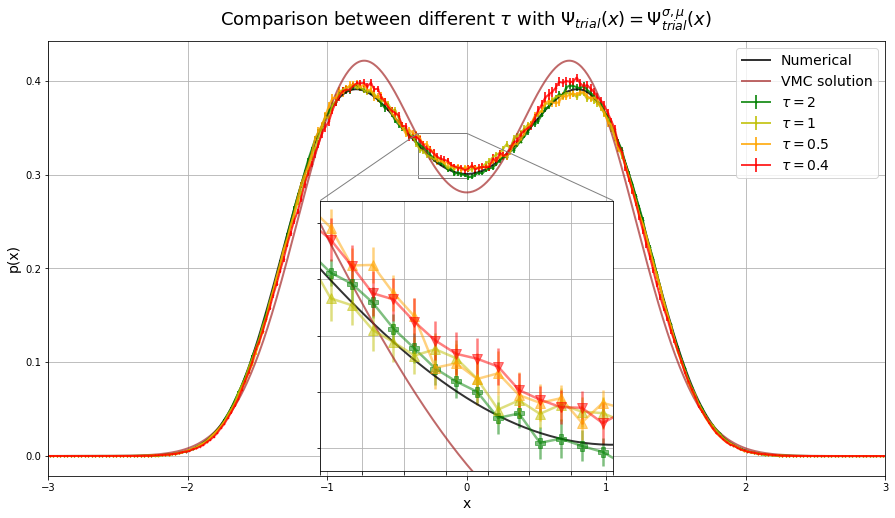

In [151]:
x = np.linspace(-5, 5, 1000)
dx = x[1] - x[0] # the step size
V = Vpot(x)
psi_squared = Psi_squared(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
norm = quad(Psi_squared, -3, 3)[0]

fig, ax = plt.subplots(figsize=(15,8))
plt.title(r'Comparison between different $\tau$ with $\Psi_{trial}(x)=\Psi_{trial}^{\sigma,\mu}(x)$ ', fontsize=18,pad=15)
plt.xlabel('x',fontsize=14)
plt.ylabel('p(x)',fontsize=14)
plt.grid(True)
plt.xlim(-3,3)

#Zoom
x1, x2, y1, y2 = -0.35, 0, 0.296,0.344
axins = zoomed_inset_axes(ax, zoom=6, loc='lower center')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

#Grafico soluzione analitica e VMC
ax.plot(x, psi[0]**2, lw=2, color='black',label="Numerical",alpha=0.8)
axins.plot(x, psi[0]**2, lw=2,color='black', label="Numerical",alpha=0.8)
ax.plot(x,psi_squared/norm, lw=2, color="brown", label='VMC solution',alpha=0.7)
axins.plot(x,psi_squared/norm, lw=2, color="brown", label='VMC solution',alpha=0.7)

#tau=2:
t, Psi, errPsi = ((np.genfromtxt('probability_not_const_wf_tau2.dat', usecols=i, autostrip=True)) for i in range(3))

ax.errorbar(t, Psi, yerr=errPsi, color='g', alpha=0.8, marker='P',linewidth=2, markersize=1, label=r'$\tau=2$')
axins.errorbar(t, Psi, yerr=errPsi , color='g',marker='P',linewidth=2.5 ,markersize=10, alpha=0.5)

#tau=1:
t, Psi, errPsi = ((np.genfromtxt('probability_not_const_wf_tau1.dat', usecols=i, autostrip=True)) for i in range(3))

ax.errorbar(t, Psi, yerr=errPsi, color='y', alpha=0.8, marker='^',linewidth=2, markersize=1, label=r'$\tau=1$')
axins.errorbar(t, Psi, yerr=errPsi , color='y',marker='^',linewidth=2.5 ,markersize=10, alpha=0.5)

#tau=0.5:
t, Psi, errPsi = ((np.genfromtxt('probability_not_const_wf_tau0.dat', usecols=i, autostrip=True)) for i in range(3))

ax.errorbar(t, Psi, yerr=errPsi, color='orange', alpha=0.8, marker='^',linewidth=2, markersize=1, label=r'$\tau=0.5$')
axins.errorbar(t, Psi, yerr=errPsi ,color='orange',marker='^',linewidth=2.5 ,markersize=10, alpha=0.5)

#tau=0.4:
t, Psi, errPsi = ((np.genfromtxt('probability_not_const_wf_tau0.4.dat', usecols=i, autostrip=True)) for i in range(3))

ax.errorbar(t, Psi, yerr=errPsi, color='r', alpha=0.8, marker='v',linewidth=2, markersize=1, label=r'$\tau=0.4$')
axins.errorbar(t, Psi, yerr=errPsi ,color='r',marker='v',linewidth=2.5 ,markersize=10, alpha=0.5)

ax.legend(loc='best',fontsize=14)
plt.grid(True)
plt.draw()
plt.show()

In questo caso utilizziamo una funzione d'onda di prova che somiglia maggiormente al reale stato di GS e perciò l'intervallo di tempo $\tau$ entro il quale riusciamo ad ottenere una curva fedele è minore. Da come possiamo vedere in figura, il limite accettabile è circa $\tau\sim1$ (al limite della compatibilità).

Si noti come, dal punto di vista computazionale, non siamo in grado di portare le probabilità di accettazione browniane al $50\%$  per i $\tau$ al di sotto dei valori limite. Questo vale sia usando la funzione di trial costante, sia usando la funzione ottimizzata dell'esercizio precedente.

**B) PIMC:** 

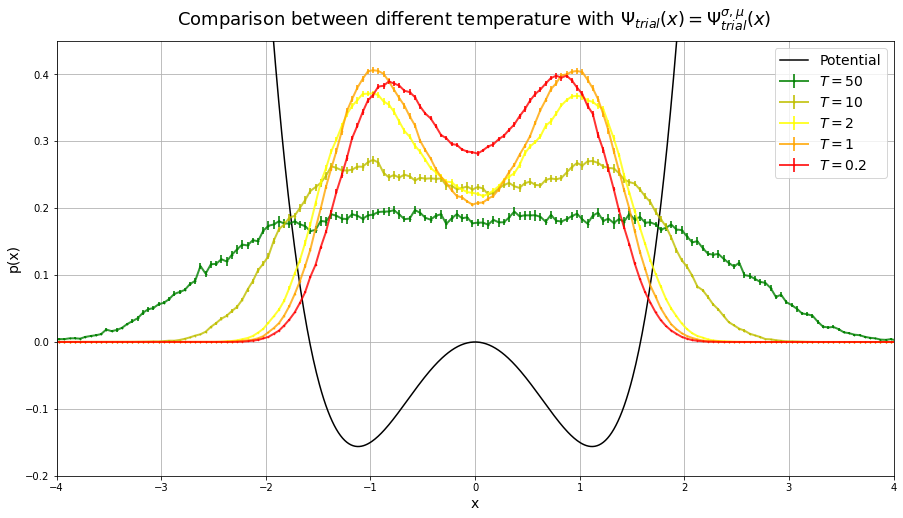

In [156]:
x = np.linspace(-5, 5, 1000)
dx = x[1] - x[0] # the step size
V = Vpot(x)
psi_squared = Psi_squared(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
norm = quad(Psi_squared, -3, 3)[0]

fig, ax = plt.subplots(figsize=(15,8))
plt.title(r'Comparison between different temperature with $\Psi_{trial}(x)=\Psi_{trial}^{\sigma,\mu}(x)$ ', fontsize=18,pad=15)
plt.xlabel('x',fontsize=14)
plt.ylabel('p(x)',fontsize=14)
plt.grid(True)
plt.xlim(-4,4)
plt.ylim(-0.2,0.45)

scale=0.1
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential

#temperature=50:
t, Psi, errPsi = ((np.genfromtxt('probability_not_const_wf_PIMC_temperature50.dat', usecols=i, autostrip=True)) for i in range(3))
ax.errorbar(t, Psi, yerr=errPsi, color='g', alpha=0.8, marker='P',linewidth=2, markersize=1, label=r'$T=50$')

#temperature=10:
t, Psi, errPsi = ((np.genfromtxt('probability_not_const_wf_PIMC_temperature10.dat', usecols=i, autostrip=True)) for i in range(3))
ax.errorbar(t, Psi, yerr=errPsi, color='y', alpha=0.8, marker='^',linewidth=2, markersize=1, label=r'$T=10$')

#temperature=2:
t, Psi, errPsi = ((np.genfromtxt('probability_not_const_wf_PIMC_temperature2.dat', usecols=i, autostrip=True)) for i in range(3))
ax.errorbar(t, Psi, yerr=errPsi, color='yellow', alpha=0.8, marker='v',linewidth=2, markersize=1, label=r'$T=2$')

#temperature=1:
t, Psi, errPsi = ((np.genfromtxt('probability_not_const_wf_PIMC_temperature1.dat', usecols=i, autostrip=True)) for i in range(3))
ax.errorbar(t, Psi, yerr=errPsi, color='orange', alpha=0.8, marker='^',linewidth=2, markersize=1, label=r'$T=1$')

#temperature=0.2:
t, Psi, errPsi = ((np.genfromtxt('probability_not_const_wf_PIMC_temperature0.2.dat', usecols=i, autostrip=True)) for i in range(3))
ax.errorbar(t, Psi, yerr=errPsi, color='r', alpha=0.8, marker='v',linewidth=2, markersize=1, label=r'$T=0.2$')

ax.legend(loc='best',fontsize=14)
plt.grid(True)
plt.draw()
plt.show()

Osserviamo come, nella figura sovrastante, in base ai range di temperatura, la distribuzione di probabilità evolve in maniera differente. Da un lato, nel range $T\in[1,50]$, $|\Psi(x)|^2$ tende a sbrodolare e quindi a perdere i due massimi e il minimo centrale locale e ciò significa che la particella tende ad esplorare più facilmente zone ad alto potenziale. Dall'altro, nel range $T\in[0,1]$ accade che, all'aumentare di $T$, il minimo di $|\Psi(x)|^2$ tende ad accentuarsi, così come i massimi.
Questo comportamento è spiegabile osservando le autofunzioni che si ottengono risolvendo l'equazione di Schrödinger in forma matriciale. Queste possiedono un numero di zeri pari al livello eccitato di riferimento e in particolare, essendo lo stato di trial una sovrapposizione di queste autofunzioni di $\hat{H}$, al crescere della temperatura,
aumenta la probabilità che la particella si trovi negli stati eccitati di $\hat{H}$.
Il primo stato eccitato, in particolare, ha un solo zero centrale che si trova in corrispondenza del minimo della $|\Psi_{GS}|^2$, perciò, quando la temperatura non è troppo alta, viene a generarsi la sovrapposizione tra lo stato $|\Psi_{GS}\rangle$ e il primo eccitato. Questo fatto porta inevitabilmente all'abbassamento del minimo e ad un conseguente rafforzamento dei due massimi della probabilità $|\Psi(x)|^2$ totale.

Naturalmente, questo ragionamento deve essere seguito anche alle temperature più alte, laddove, il numero di stati eccitati disponibili cresce sempre più e la combinazione di questi porta $|\Psi(x)|^2$ ad avere un plateu nella regione centrale.